In [17]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
import gym
import numpy as np
import collections 
import cv2 

from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
 
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

from IPython import display


# Import os for file path management
import os 
# Import PPO for algos 
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True
    

def show_state(env, ep, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Episode %a - Step: %d Info:%s" % (ep, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    
def make_env(env):
    # Setup game 
    env = JoypadSpace(env, SIMPLE_MOVEMENT)
     
    # Set grayscale 
    env = GrayScaleObservation(env, keep_dim=True)
    # Wrap inside the Dummy Environment
    env = DummyVecEnv([lambda: env])
    # Stack the frames
    env = VecFrameStack(env, 4, channels_order='last')
        
    return env 


def level(world, lev):
    env = gym_super_mario_bros.make('SuperMarioBros-' + str(world) + '-' + str(lev) + '-v0')
    env = make_env(env)
    # Start the game  
    state = env.reset() 
    return env, state
  

#TRAINING RL MODEL
def training(): 
    CHECKPOINT_DIR = './train/'
    LOG_DIR = './logs/'

    env = gym_super_mario_bros.make('SuperMarioBros-v2')
    env = make_env(env)
        
    model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

    # Setup model saving callback
    callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

    # Train the AI model, this is where the AI model starts to learn
    model.learn(total_timesteps=1000000, callback=callback)

    model.save('thisisatestmodel')
 

# Load model 
def load_model(model_name):
    env, state = level(1, 1)
    LOG_DIR = './logs/'
    model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 
    model = PPO.load('C://Users//lamps//source//python//mario_dev_ppo//' + model_name)
    return model, env, state
step = 0

In [12]:
print(dir( gym_super_mario_bros.actions ))

['COMPLEX_MOVEMENT', 'RIGHT_ONLY', 'SIMPLE_MOVEMENT', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [11]:
 gym_super_mario_bros.actions.COMPLEX_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left'],
 ['left', 'A'],
 ['left', 'B'],
 ['left', 'A', 'B'],
 ['down'],
 ['up']]

In [10]:
 gym_super_mario_bros.actions.RIGHT_ONLY

[['NOOP'], ['right'], ['right', 'A'], ['right', 'B'], ['right', 'A', 'B']]

In [9]:
 gym_super_mario_bros.actions.SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

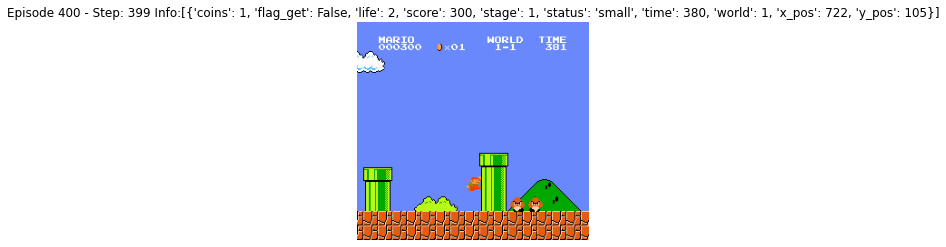

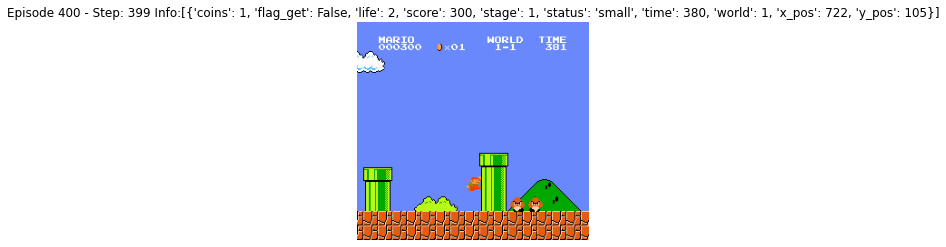

In [18]:

model, env, state = load_model('train//best_model_450000')
score = []
for i in range(0,400):
    step = 0
    done = False
    time=0
    new_position = 0
    while (done == False): 
        action, _ = model.predict(state)
        state, reward, done, info = env.step(action)

        step = step + 1

        if(step%400==0):
            if(info[0]['x_pos'] > new_position):
                new_position = info[0]['x_pos']
            else:
                done = True
                env.reset()
                break
                
        if done:
            display.clear_output(wait=True)        
            break
        
        if(step%3==0):  #buffer to only show every n frame  
            show_state(env,i+1,step,info) 
        new_position = info[0]['x_pos']
    
    score.append(new_position)

In [14]:
score

[311,
 1669,
 682,
 1147,
 707,
 2022,
 722,
 307,
 312,
 722,
 722,
 898,
 308,
 1128,
 1239,
 805,
 1243,
 679,
 675,
 722,
 722,
 309,
 722,
 1128,
 722,
 722,
 308,
 722,
 674,
 297,
 1128,
 309,
 296,
 898,
 673,
 1152,
 684,
 722,
 898,
 722,
 695,
 1432,
 666,
 682,
 898,
 308,
 722,
 898,
 707,
 898,
 722,
 677,
 722,
 1415,
 700,
 689,
 722,
 311,
 307,
 311,
 1127,
 696,
 311,
 695,
 680,
 1128,
 309,
 309,
 669,
 722,
 722,
 706,
 700,
 308,
 898,
 898,
 702,
 1525,
 1126,
 722,
 803,
 2474,
 722,
 594,
 297,
 722,
 682,
 308,
 898,
 898,
 677,
 898,
 722,
 812,
 687,
 1128,
 1241,
 722,
 307,
 898,
 722,
 312,
 1425,
 898,
 594,
 670,
 722,
 708,
 722,
 1127,
 1148,
 697,
 673,
 309,
 898,
 674,
 722,
 696,
 308,
 309,
 722,
 677,
 898,
 299,
 309,
 722,
 308,
 1128,
 299,
 309,
 722,
 722,
 1126,
 308,
 310,
 722,
 594,
 1431,
 722,
 722,
 1152,
 681,
 699,
 691,
 307,
 308,
 722,
 311,
 309,
 700,
 1128,
 300,
 308,
 898,
 898,
 722,
 697,
 1236,
 722,
 1431,
 688,
 698,


In [ ]:
for w in range (1, 8):
    for l in range (1, 4):
        env, state = level(w, l)
        step = 0
        done = False
        while (done == False): 
            action, _ = model.predict(state)
            state, reward, done, info = env.step(action)
            #
            step = step + 1
            time = 0
            horizon_pos = 0
 
            if done:
                display.clear_output(wait=True)
                break
            show_state(env,step,info)

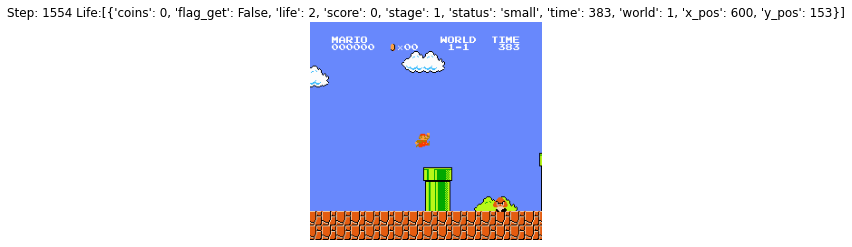

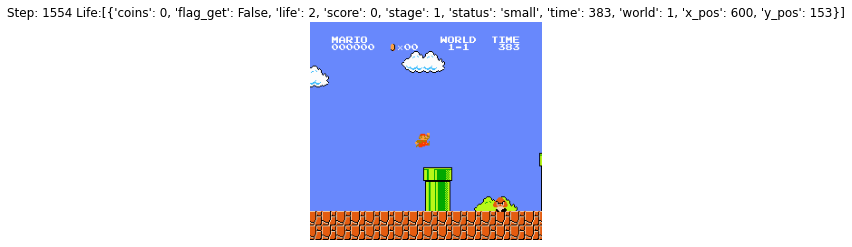

In [19]:
#train//best_model_450000
sum = 0
for x in score:
    sum = sum + x
sum/len(score)

633.015

In [15]:
#thisisatestmodel
sum = 0
for x in score:
    sum = sum + x
sum/len(score)

740.64